In [305]:
# This code solves the one-dimensional (1-D) acoustic wave equation using the finite difference method

# The acoustic wave equation is defined as: d2U/dt2 = 1/v/v* d2U/dx2 + S(t,x0)
# where U is the wavefield, v is velocity of the model, t is time, x is lateral distance,
# and S(x0) is the source signature at location x0, which is this modelling is Ricker wavelet

# The finite difference discretization of the 1-D acoustic wave equation is as follows:
# (U(t2,x1)-2U(t1,x1)+u(t0,x1)) / (dt*dt) = 1/v/v * (U(t1,x2)-2*U(t1,x1)+U(t1,x0)) / (dx*dx)
# In this modelling, I assume the velocity is homogeneous, which means v is a constant value

In [331]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [337]:
X = 10000 # The size of the 1-D model, unit: meter
v = 3000 # The acoustic velocity of the 1-D model, unit: meter/second
T = 1 # The maximum modelling time
dx = 20.0  # Grid spacing for discretize the 1-D model, unit: meter
dt = 0.002 # Time step for modelling, unit: second
fm = 10.0  # Main frequency of the Ricker wavelet
Xs = X/2   # Location of source wavelt

In [338]:
Nx = int(X//dx)
Nt = int(T//dt)+1
print("The model is discretized in", Nx, "grids")
print("The total modelling time step is", Nt)

The model is discretized in 500 grids
The total modelling time step is 500


In [339]:
Rs = np.zeros((Nt), dtype=float)  

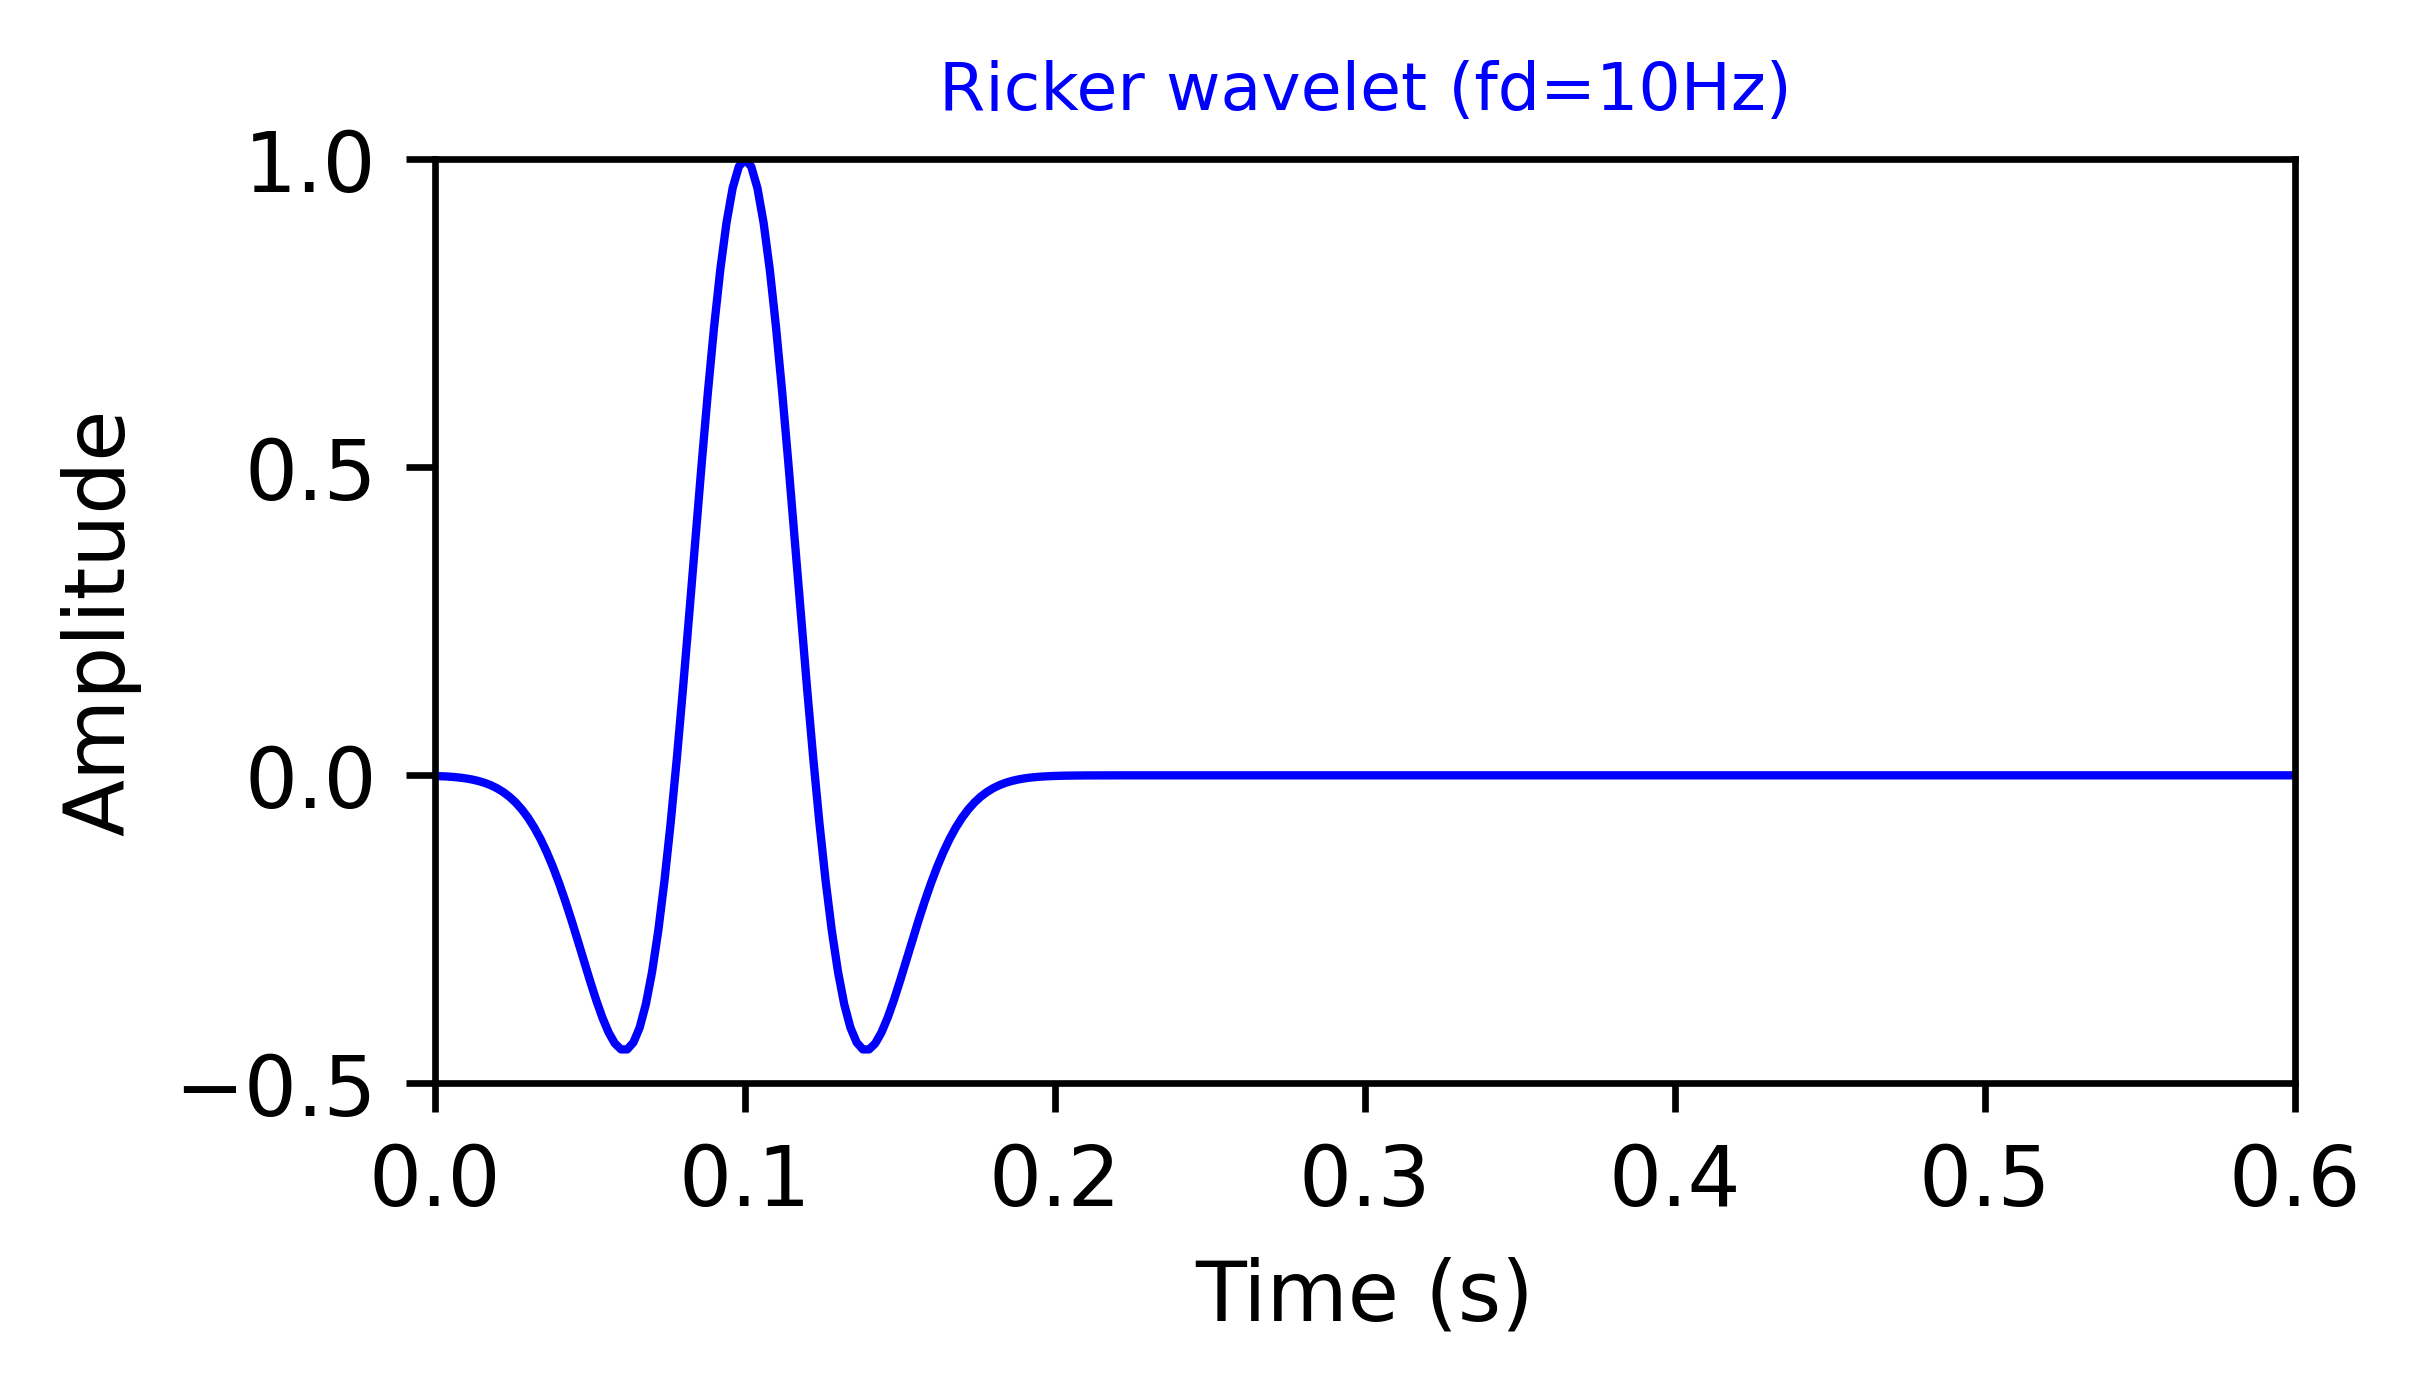

In [344]:
# define Ricker wavelet
pi = 3.141592653589793
t = np.linspace(0, (Nt-1)*dt, Nt)
                
for it in range(0,Nt):
    Rs[it]=(1.0-2.0*(pi*fm*(t[it]-0.1))**2)*math.exp(-1*(pi*fm*(t[it]-0.1))**2)
    
# Plot the Ricker wavelet
plt.figure(num=1,figsize=(4,2),dpi=600)
plt.plot(t,Rs,color='blue',linewidth=1.0,linestyle='-')

# set parameter for figure plot
plt.xlim(0,0.6)
plt.ylim(-0.5,1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
ax=plt.gca()
ax.set_title('Ricker wavelet (fd=10Hz)',fontsize=8,color='b')
plt.show()

250


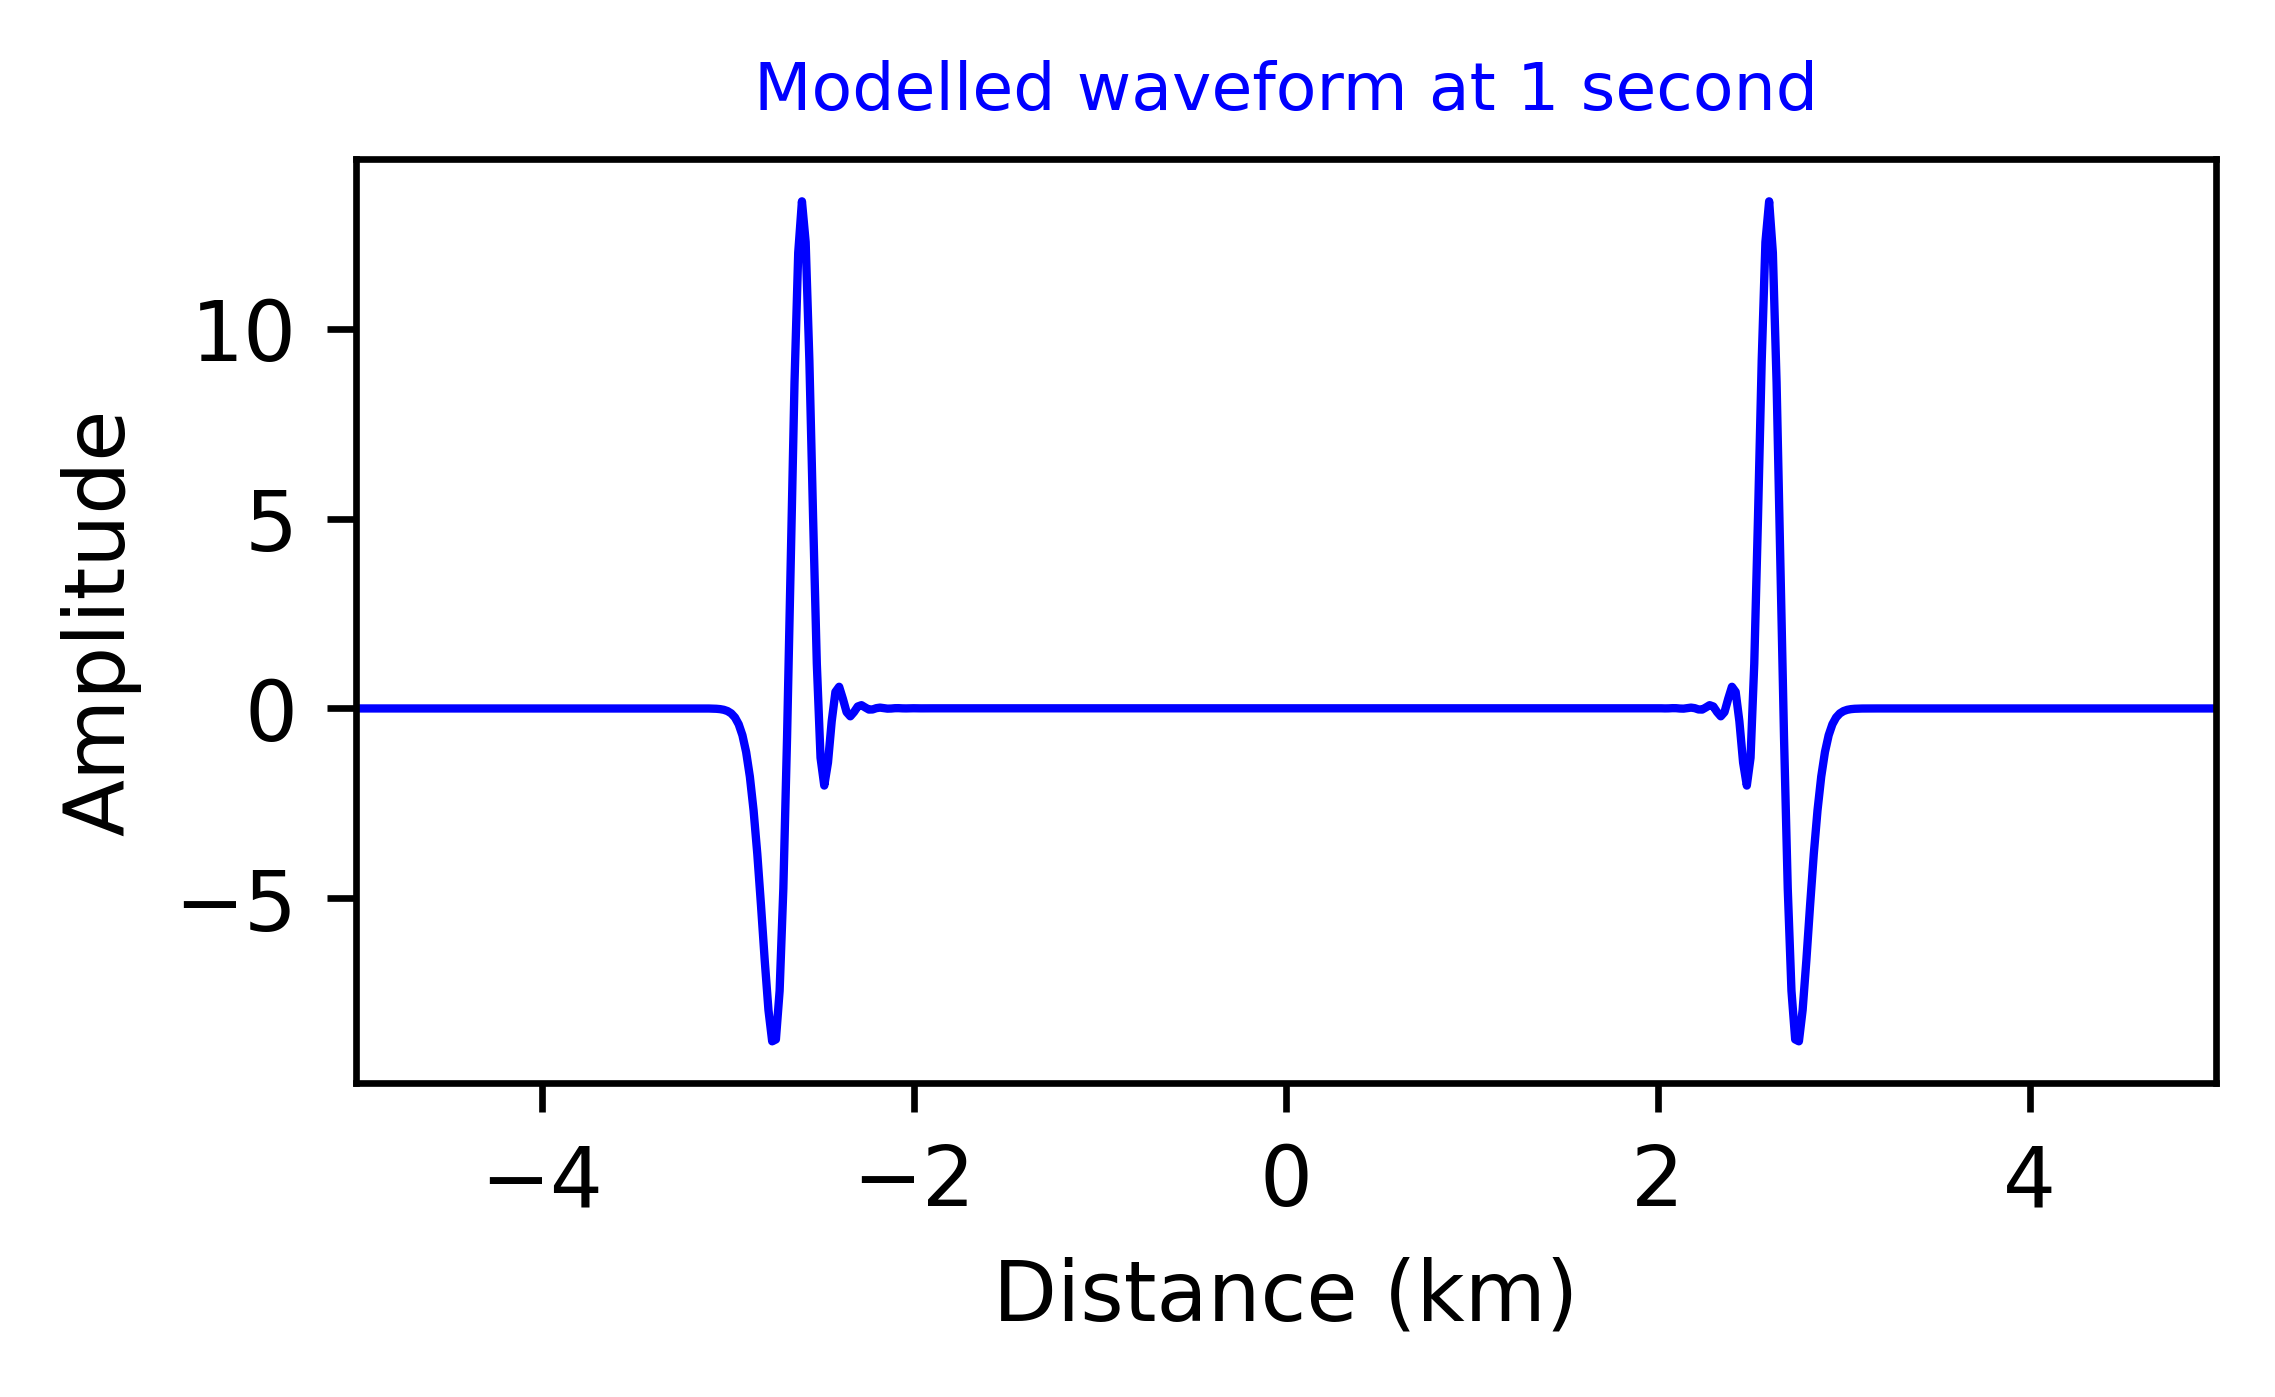

In [347]:
v2t2_dx2 = v*v*dt*dt/dx/dx
x = np.linspace(0, (Nx-1)*dx, Nx) - (X/2)
ixs = int(Xs/dx)

# Define the array for waveform value at time step 2,1 and 0
U2 = np.zeros((Nx), dtype=float)
U1 = np.zeros((Nx), dtype=float)
U0 = np.zeros((Nx), dtype=float)

print(ixs)

for it in range(0,Nt):
    for ix in range(1,Nx-2):
        U2[ix] = 2.0*U1[ix] - U0[ix] + v2t2_dx2 * (U1[ix+1] -2.0*U1[ix] + U1[ix-1]) 
        if ix == ixs:
            U2[ixs] = U2[ixs] + Rs[it]
    for ix in range(0,Nx):
        U0[ix] = U1[ix]
        U1[ix] = U2[ix]
     
    
# Plot the waveform
plt.figure(num=1,figsize=(4,2),dpi=600)
plt.plot(x/1000,U2,color='blue',linewidth=1.0,linestyle='-')

# set parameter for figure plot
plt.xlim(-1*X/2/1000,X/2/1000)
#plt.ylim(-0.5,1)
plt.xlabel('Distance (km)')
plt.ylabel('Amplitude')
ax=plt.gca()
ax.set_title('Modelled waveform at 1 second',fontsize=8,color='b')
plt.show()   